<a href="https://colab.research.google.com/github/ahmadayoubi404/Deep-Learning/blob/main/7_MNIST(more_visualization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# **MNIST Dataset**

In [3]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(X_train.dtype)
print(y_train.dtype)
print(X_test.dtype)
print(y_test.dtype)

print(X_train[:5]) #printing the first 5 images
print(y_train[:5]) #printing the first 5 labels


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
uint8
uint8
uint8
uint8
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[5 0 4 1 9]


normalizing the images and expanding the dimension of them to 4 instead of 3, from (batch_size, height, width) to (batch_size, height, width, channels) channel for grayscale required by CNNs
changing the types of the images and their labels from unsigned int to float

In [5]:
X_train = (np.expand_dims(X_train, axis=-1)/255).astype(np.float32)
y_train = (y_train).astype(np.float32)
X_test = (np.expand_dims(X_test, axis=-1)/255).astype(np.float32)
y_test = (y_test).astype(np.float32)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(X_train.dtype)
print(y_train.dtype)
print(X_test.dtype)
print(y_test.dtype)

print(X_train[:5]) #printing the first 5 images
print(y_train[:5]) #printing the first 5 labels

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)
float32
float32
float32
float32
[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
 

# **Visualization**

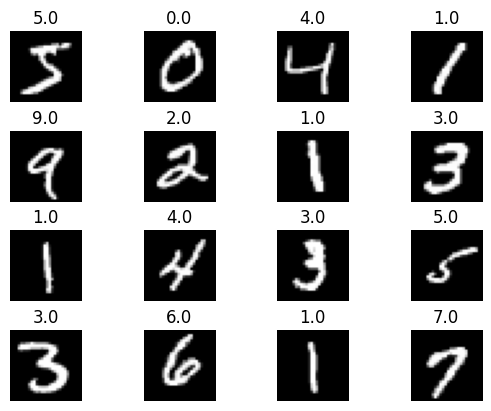

In [6]:
for i, (image, label) in enumerate(zip(X_train[:16], y_train[:16])):
    ax = plt.subplot(4, 4, i+1)
    #plt.imshow(image)
    plt.imshow(image, cmap='gray')
    plt.title(label)
    plt.axis('off')

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

# **Fully Connected Neural Network Architecture**

In [36]:
##for bigger models or for when you can't see the parameters like in CNN
# fc_model = tf.keras.Sequential([
#     tf.keras.layers.InputLayer(input_shape=(28,28,1)),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])
fc_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#will be tuned later
fc_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

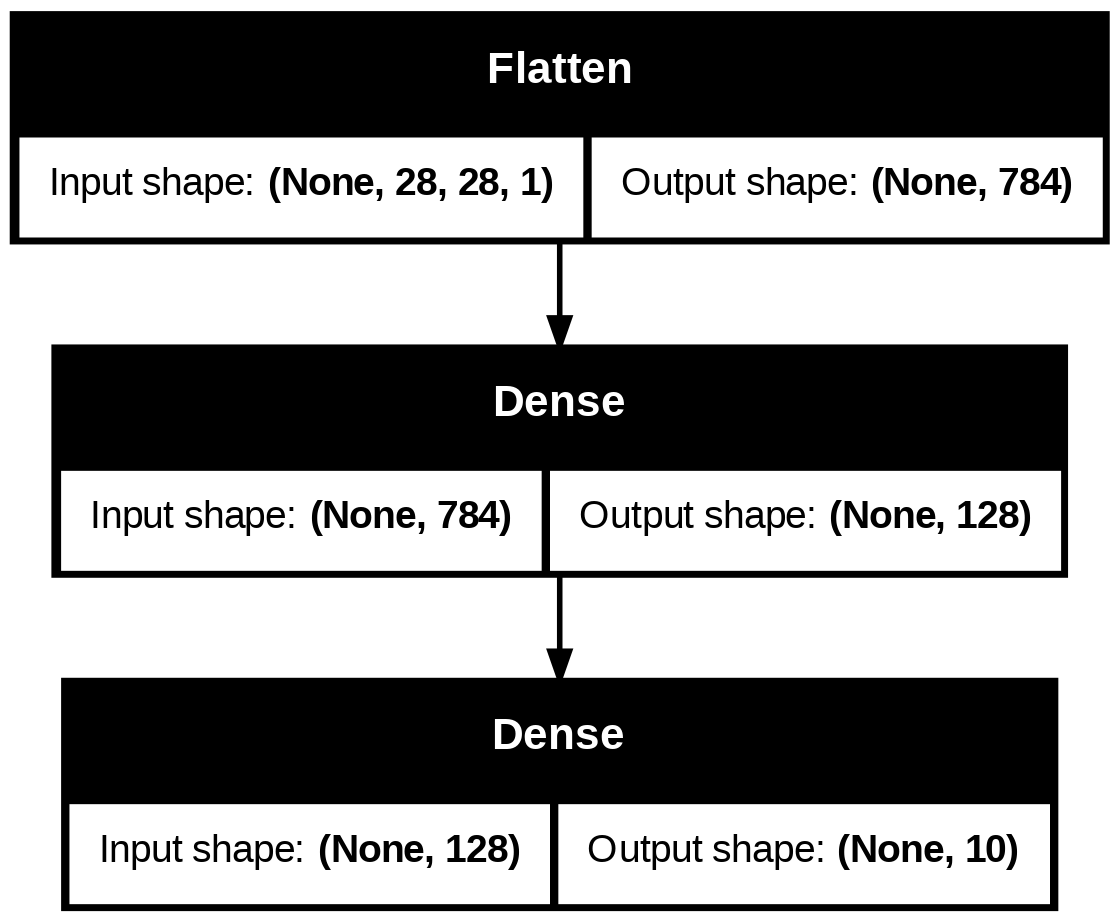

In [37]:
tf.keras.utils.plot_model(fc_model, show_shapes=True)

now let's compile our model

In [38]:
#try both
#fc_model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
fc_model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

#will be tuned later

training the model

In [39]:
#history fc_model.fit(x_train, y_train) #default: epoch = 1 batch_size = 32, shuffle=True, no use of validation data
#history = fc_model.fit(X_train, y_train, validation_split=0.1, batch_size=64, epochs=5)
history = fc_model.fit(X_train, y_train, validation_split=0.1, batch_size=32, epochs=10, shuffle=False)
#will be tuned later
#not that the number 844 in each epoch is the number of batches per epoch we get it by: total training samples / batch size = 60000 * 0.9 / 64 = 844

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8683 - loss: 0.4744 - val_accuracy: 0.9440 - val_loss: 0.1853
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9529 - loss: 0.1651 - val_accuracy: 0.9665 - val_loss: 0.1258
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9678 - loss: 0.1136 - val_accuracy: 0.9713 - val_loss: 0.1036
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9758 - loss: 0.0870 - val_accuracy: 0.9737 - val_loss: 0.0903
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9804 - loss: 0.0702 - val_accuracy: 0.9760 - val_loss: 0.0834
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9839 - loss: 0.0583 - val_accuracy: 0.9760 - val_loss: 0.0793
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9872 - loss: 0.0491 - val_accuracy: 0.9763 - val_loss: 0.0758
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9898 - loss: 0.0421 -

plotting the Loss and accuracy

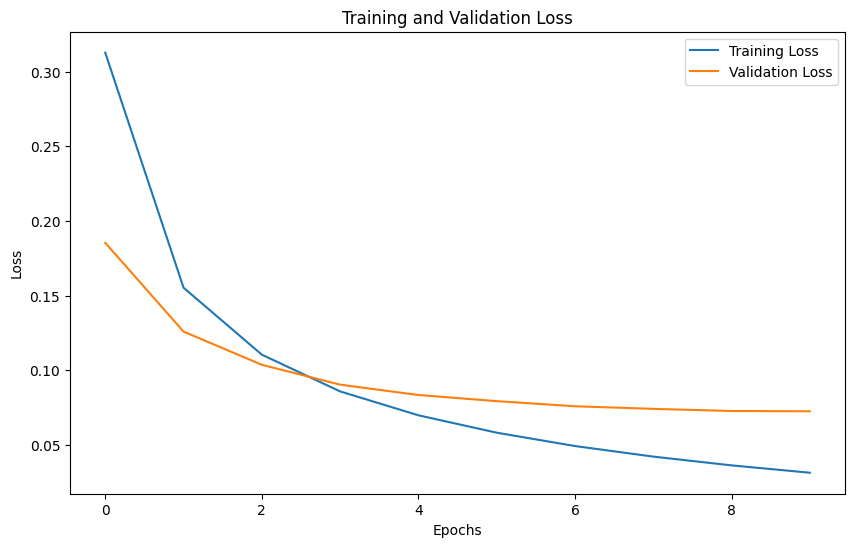

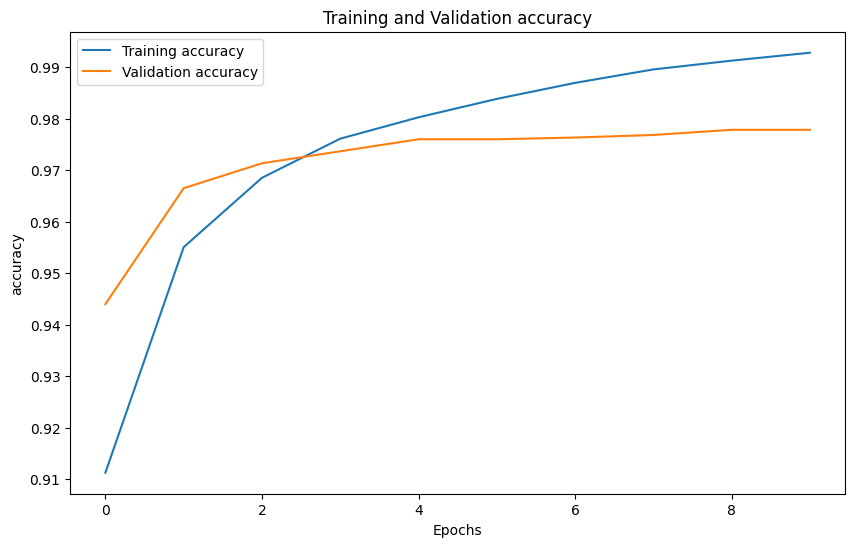

In [40]:
# Extract loss values
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Extract accuracy values
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Evaluae the [loss,accuracy] on the test dataset

In [41]:
fc_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9727 - loss: 0.0859


[0.07375100255012512, 0.9771000146865845]

Make Predictions with the fully connected model

In [42]:
predictions = fc_model.predict(X_test)
print(predictions.shape)
print(predictions[0])
#Let's look at the digit that has the highest confidence for the first image in the test dataset
print(np.argmax(predictions[0]))
#note that in a binary classification problem we can simply check if it > or < than 0.5

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)
[2.5243500e-07 3.0691908e-08 1.7057184e-05 7.0758077e-04 3.4349870e-10
 4.7997933e-06 3.7730374e-12 9.9925065e-01 7.5184962e-06 1.2154338e-05]
7


checking if the prediction is correct

Label of this digit is: 7.0


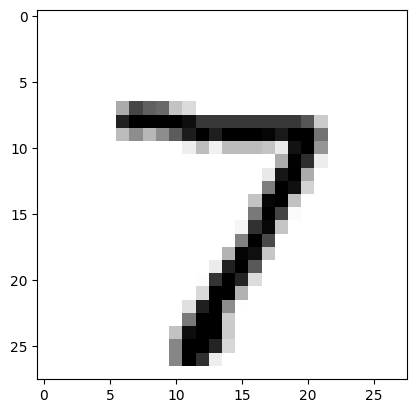

In [43]:
print("Label of this digit is:", y_test[0])
plt.imshow(X_test[0,:,:,0], cmap=plt.cm.binary)

showing some results

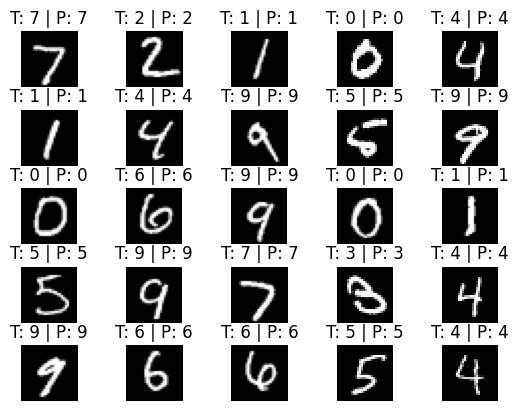

In [44]:
for i, (image, label) in enumerate(zip(X_test[:25], y_test[:25])):
    ax = plt.subplot(5, 5, i+1)
    #plt.imshow(image)
    plt.imshow(image, cmap='gray')
    plt.title("T: " + str(int(label)) + " | P: " + str(int(np.argmax(predictions[i]))))
    plt.axis('off')

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

as we can see even with a really high accuracy we still got some of the prediction wrong!
let's make a stronger model!

# **Convolutional Neural Network Architecture**

In [46]:
cnn_model = tf.keras.Sequential([
    #without the InputLayer we cant see the shape and parameters
    tf.keras.layers.InputLayer(input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), strides=(1,1), activation='relu'),
    #tf.keras.layers.BatchNormalization(), #It generally leads to improved, it is usually put behind the conv2D layer
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), strides=(1,1), activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

#will be tuned later
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 24)          │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 36)          │           7,812 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 36)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 900)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         115,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 124,670 (486.99 KB)

 Trainable params: 124,670 (486.99 KB)

 Non-trainable params: 0 (0.00 B)

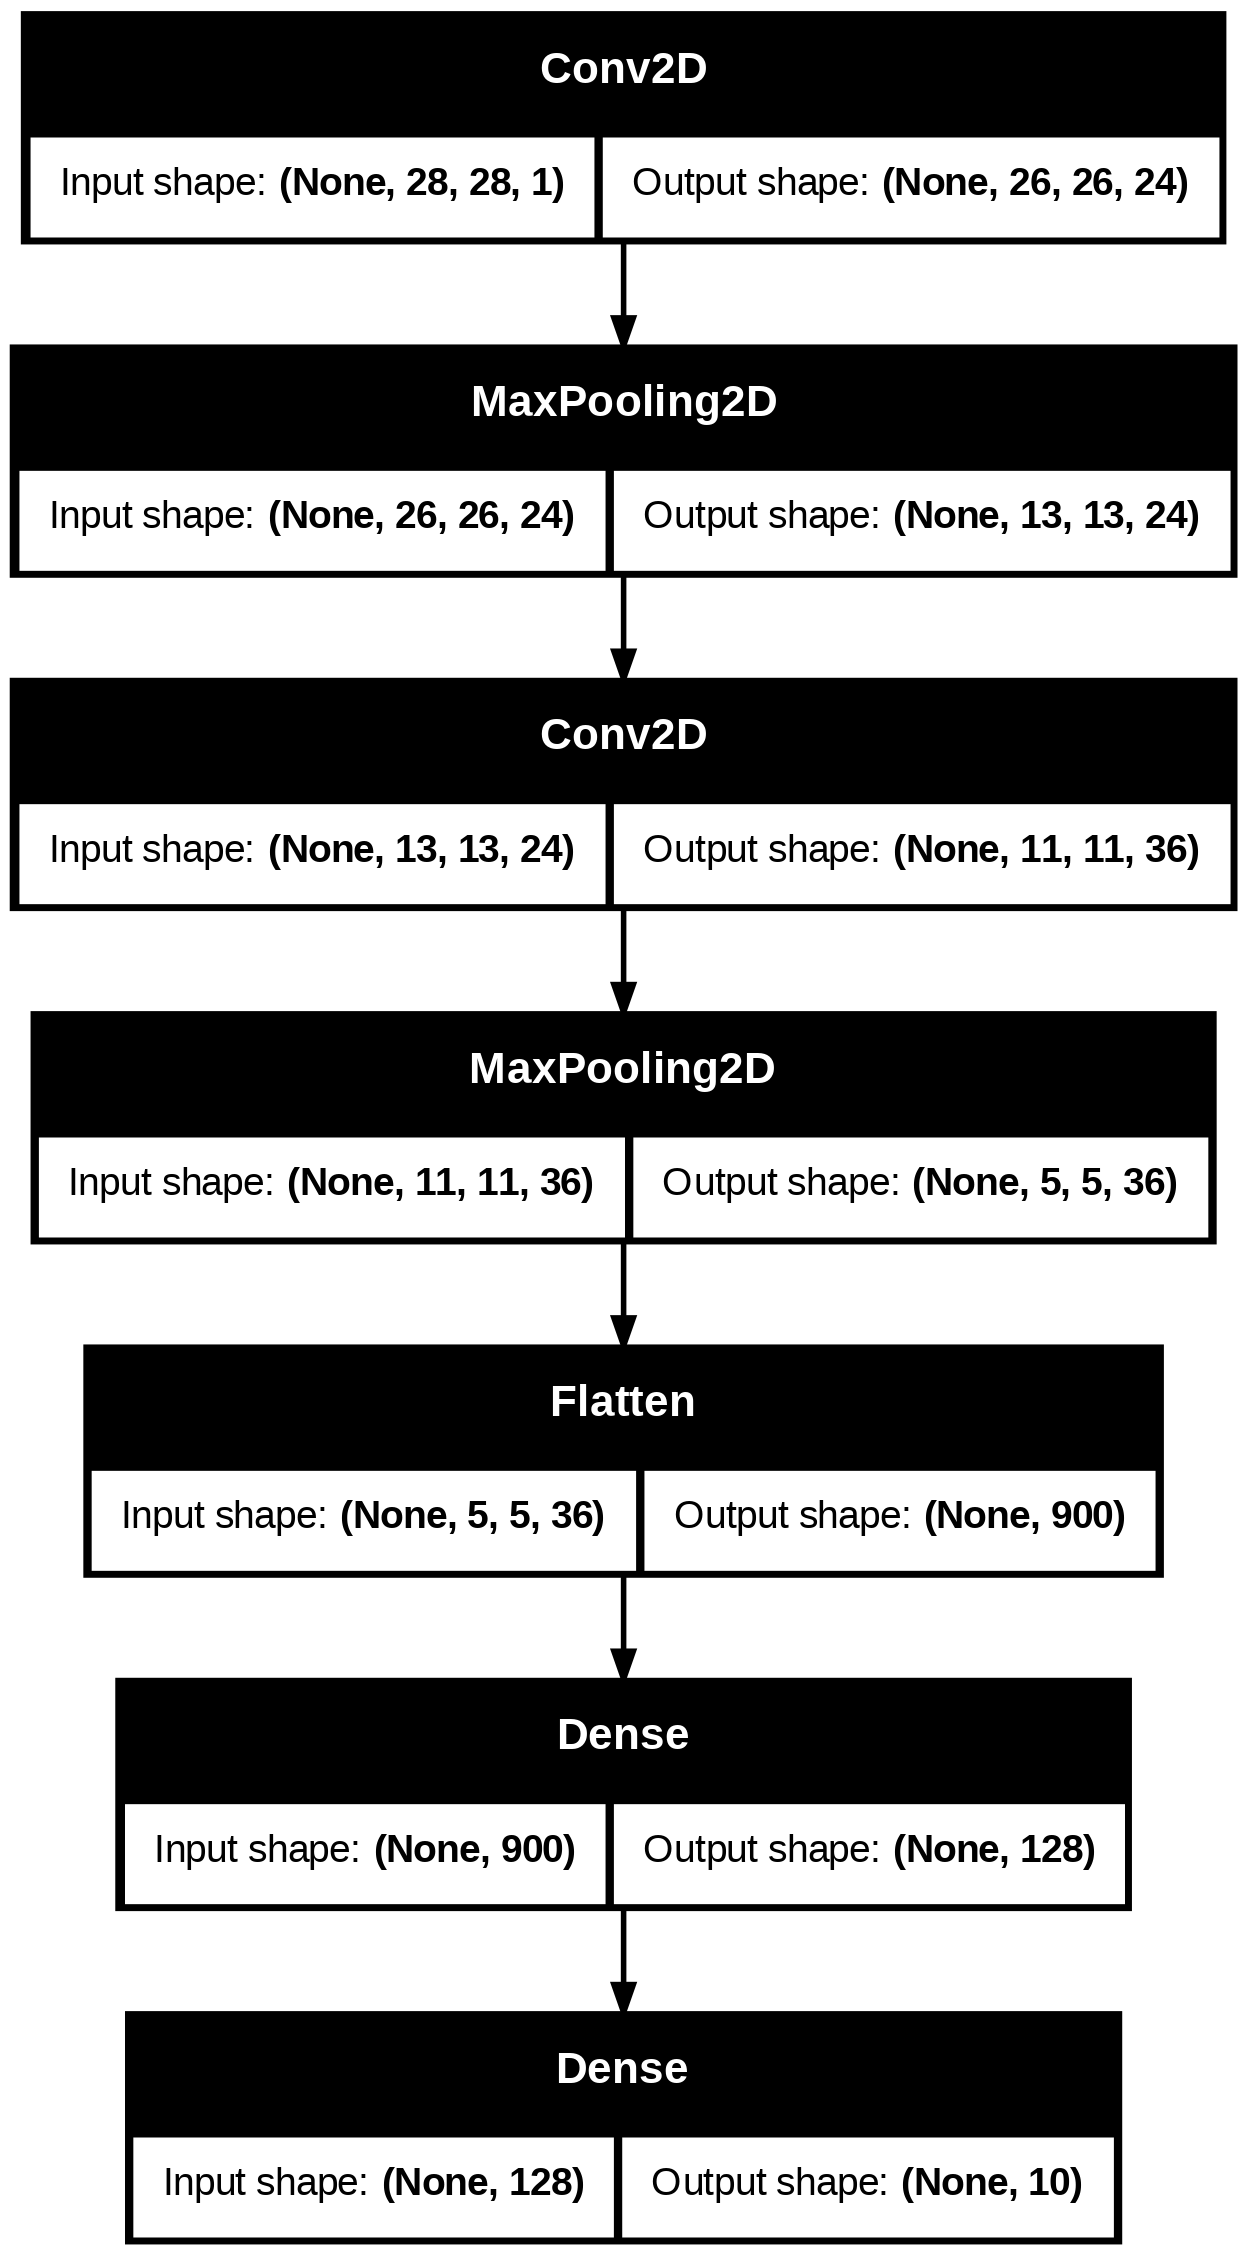

In [47]:
tf.keras.utils.plot_model(cnn_model, show_shapes=True)

now let's compile our model

In [48]:
# cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
#               loss = tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics = ['accuracy'])

#will be tuned later

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

training the model

In [49]:
#history = cnn_model.fit(X_train, y_train, validation_split=0.1, batch_size=64, epochs=5)
history = cnn_model.fit(X_train, y_train, validation_split=0.1, batch_size=32, epochs=10)
#will be tuned later because it overfitted

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.8979 - loss: 0.3309 - val_accuracy: 0.9850 - val_loss: 0.0502
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9837 - loss: 0.0518 - val_accuracy: 0.9852 - val_loss: 0.0482
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 24ms/step - accuracy: 0.9893 - loss: 0.0336 - val_accuracy: 0.9897 - val_loss: 0.0390
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9925 - loss: 0.0232 - val_accuracy: 0.9895 - val_loss: 0.0361
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9934 - loss: 0.0194 - val_accuracy: 0.9890 - val_loss: 0.0397
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.9958 - loss: 0.0138 - val_accuracy: 0.9917 - val_loss: 0.0374
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9965 - loss: 0.0108 - val_accuracy: 0.9903 - val_loss: 0.0413
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.9975 -

plotting the loss and the accuracy

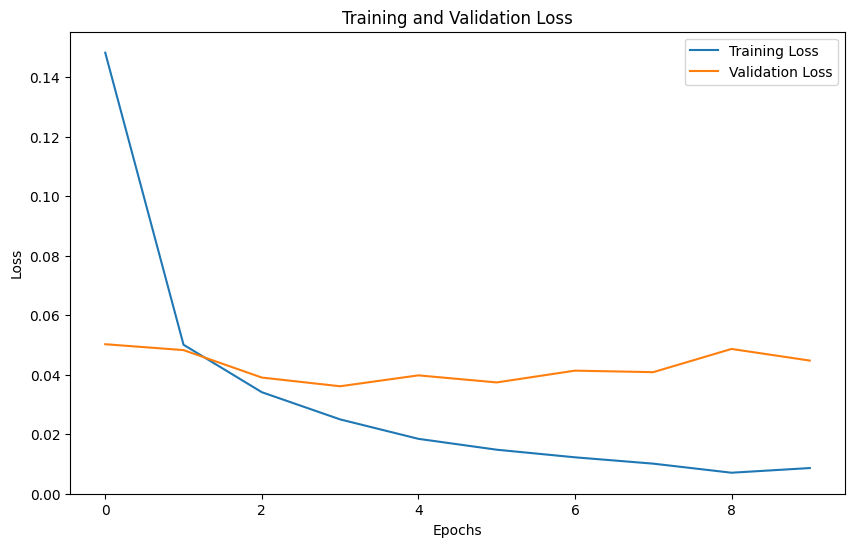

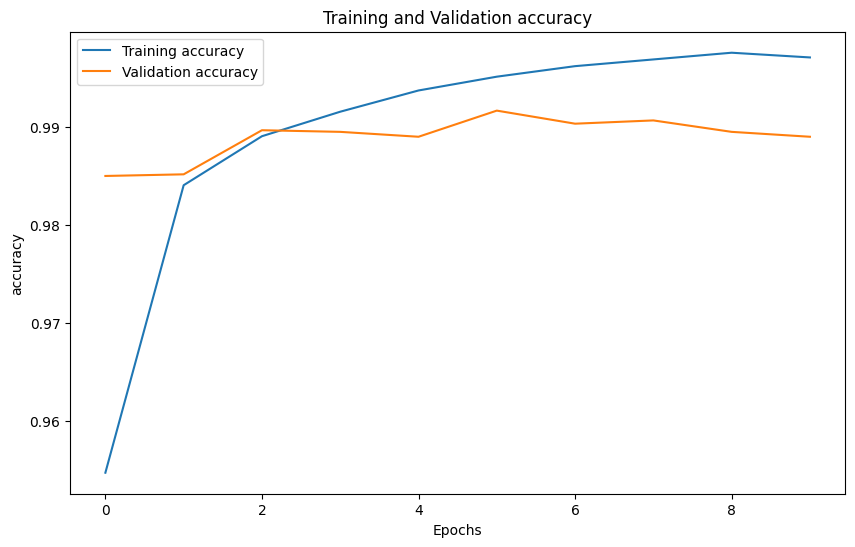

In [50]:
# Extract loss values
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Extract accuracy values
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Evaluae the [loss,accuracy] on the test dataset

In [51]:
cnn_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9868 - loss: 0.0645


[0.048210203647613525, 0.9894999861717224]

Make Predictions with the CNN model

In [52]:
predictions = cnn_model.predict(X_test)
print(predictions.shape)
print(predictions[0])
#Let's look at the digit that has the highest confidence for the first image in the test dataset
print(np.argmax(predictions[0]))
#note that in a binary classification problem we can simply check if it > or < than 0.5

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
(10000, 10)
[6.0412175e-10 4.4672940e-10 4.8003761e-09 2.2216990e-09 1.7799909e-12
 3.6472589e-11 8.9172758e-18 9.9999994e-01 1.8932100e-10 9.5149657e-09]
7


checking if the prediction is correct

Label of this digit is: 7.0


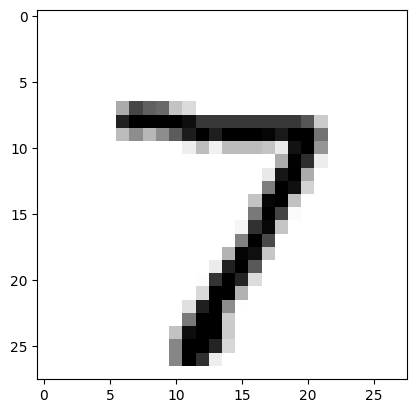

In [53]:
print("Label of this digit is:", y_test[0])
plt.imshow(X_test[0,:,:,0], cmap=plt.cm.binary)

showing some results

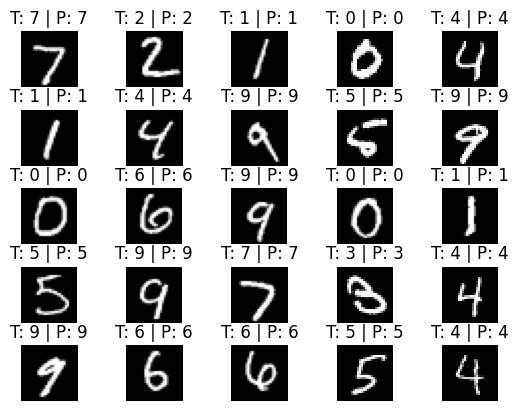

In [56]:
for i, (image, label) in enumerate(zip(X_test[:25], y_test[:25])):
    ax = plt.subplot(5, 5, i+1)
    #plt.imshow(image)
    plt.imshow(image, cmap='gray')
    plt.title("T: " + str(int(label)) + " | P: " + str(int(np.argmax(predictions[i]))))
    plt.axis('off')

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()